In [1]:
import pandas as pd

churn_cust_info = pd.read_excel("Bank_Churn_Messy.xlsx")

churn_cust_info.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58
2,15619304,Onio,502,French,Female,42.0,8,€113931.57
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1


In [2]:
churn_acct_info = pd.read_excel("Bank_Churn_Messy.xlsx", sheet_name=1)

churn_acct_info.head()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,€0.0,1,Yes,2,Yes,1
1,15634602,€0.0,1,Yes,2,Yes,1
2,15647311,€83807.86,1,Yes,1,Yes,0
3,15619304,€159660.8,3,No,8,No,1
4,15701354,€0.0,2,No,1,No,0


In [3]:
churn_df = churn_cust_info.merge(churn_acct_info, how="left", on="CustomerId")

churn_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
1,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,1,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,8,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,1,No,0


In [4]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10004 non-null  int64  
 1   Surname          10001 non-null  object 
 2   CreditScore      10004 non-null  int64  
 3   Geography        10004 non-null  object 
 4   Gender           10004 non-null  object 
 5   Age              10001 non-null  float64
 6   Tenure_x         10004 non-null  int64  
 7   EstimatedSalary  10004 non-null  object 
 8   Balance          10004 non-null  object 
 9   NumOfProducts    10004 non-null  int64  
 10  HasCrCard        10004 non-null  object 
 11  Tenure_y         10004 non-null  int64  
 12  IsActiveMember   10004 non-null  object 
 13  Exited           10004 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 1.1+ MB


In [5]:
churn_df = churn_df.drop("Tenure_y", axis=1).rename({"Tenure_x": "Tenure"}, axis=1)

churn_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,Yes,1
1,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,No,0


In [6]:
churn_df.duplicated(keep=False)

0         True
1         True
2        False
3        False
4        False
         ...  
9999     False
10000     True
10001     True
10002     True
10003     True
Length: 10004, dtype: bool

In [7]:
churn_df.tail()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
9999,15682355,Sabbatini,772,Germany,Male,42.0,3,€92888.52,€75075.31,2,No,No,1
10000,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,No,0
10001,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,No,0
10002,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,No,0
10003,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,No,0


In [8]:
churn_df = churn_df.drop_duplicates()

In [9]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          9997 non-null   object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              9997 non-null   float64
 6   Tenure           10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  object 
 8   Balance          10000 non-null  object 
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  object 
 11  IsActiveMember   10000 non-null  object 
 12  Exited           10000 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 1.1+ MB


## Objective 2

In [10]:
churn_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,No,0
5,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1,€125510.82,1,Yes,Yes,0


In [11]:
churn_df["EstimatedSalary"] = churn_df["EstimatedSalary"].str.replace("€", "").astype("float")

In [12]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          9997 non-null   object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              9997 non-null   float64
 6   Tenure           10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Balance          10000 non-null  object 
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  object 
 11  IsActiveMember   10000 non-null  object 
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.1+ MB


In [13]:
churn_df["Balance"] = churn_df["Balance"].str.replace("€", "").astype("float")

In [14]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          9997 non-null   object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              9997 non-null   float64
 6   Tenure           10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  object 
 11  IsActiveMember   10000 non-null  object 
 12  Exited           10000 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 1.1+ MB


In [15]:
churn_df[churn_df.isna().any(axis=1) == True]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
29,15728693,NaN,574,Germany,Female,NaN,3,-999999.0,141349.43,1,Yes,Yes,0
122,15580203,NaN,674,Spain,Male,NaN,6,-999999.0,120193.42,1,No,No,0
9390,15756954,NaN,538,France,Female,NaN,2,-999999.0,0.00,1,Yes,Yes,0


In [16]:
churn_df = churn_df.fillna(value={"Surname": "MISSING", "Age": churn_df["Age"].median()})

In [17]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  float64
 6   Tenure           10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  object 
 11  IsActiveMember   10000 non-null  object 
 12  Exited           10000 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 1.1+ MB


In [18]:
churn_df.iloc[[28, 121, 9389]]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
29,15728693,MISSING,574,Germany,Female,37.0,3,-999999.0,141349.43,1,Yes,Yes,0
122,15580203,MISSING,674,Spain,Male,37.0,6,-999999.0,120193.42,1,No,No,0
9390,15756954,MISSING,538,France,Female,37.0,2,-999999.0,0.00,1,Yes,Yes,0


In [19]:
churn_df.describe()

,CustomerId,CreditScore,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921500,5.012800,99762.195289,76485.889288,1.530200,0.203700
std,7.193619e+04,96.653299,10.487552,2.892174,60583.863580,62397.405202,0.581654,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,-999999.000000,0.000000,1.000000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,50910.677500,0.000000,1.000000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,100191.725000,97198.540000,1.000000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,149388.247500,127644.240000,2.000000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,199992.480000,250898.090000,4.000000,1.000000


In [20]:
churn_df["EstimatedSalary"] = churn_df["EstimatedSalary"].replace(-999999, churn_df["EstimatedSalary"].median())

In [21]:
churn_df.describe()

,CustomerId,CreditScore,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921500,5.012800,100092.252506,76485.889288,1.530200,0.203700
std,7.193619e+04,96.653299,10.487552,2.892174,57510.146401,62397.405202,0.581654,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,11.580000,0.000000,1.000000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,51002.110000,0.000000,1.000000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,100196.062500,97198.540000,1.000000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,149388.247500,127644.240000,2.000000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,199992.480000,250898.090000,4.000000,1.000000


In [22]:
churn_df["Geography"].value_counts()

Geography
Germany    2509
Spain      2477
France     1741
French     1655
FRA        1618
Name: count, dtype: int64

In [23]:
import numpy as np

churn_df["Geography"] = np.where(churn_df["Geography"].isin(["FRA", "France", "French"]), "France", churn_df["Geography"])

churn_df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [25]:
churn_df = (
    pd.read_excel("Bank_Churn_Messy.xlsx")
    .merge(pd.read_excel("Bank_Churn_Messy.xlsx", sheet_name=1), how="left", on="CustomerId")
    .drop_duplicates()
    .drop("Tenure_y", axis=1)
    .rename(columns={"Tenure_x": "Tenure"})
    .assign(
        EstimatedSalary=lambda x: x["EstimatedSalary"].str.replace("€", "", regex=False).astype("float"),
        Balance=lambda x: x["Balance"].str.replace("€", "", regex=False).astype("float"),
        Geography=lambda x: np.where(
            x["Geography"].isin(["France", "French", "FRA"]),
            "France",
            x["Geography"]
        )
    )
)

# Replace -999999 with median in EstimatedSalary
churn_df["EstimatedSalary"] = churn_df["EstimatedSalary"].replace(-999999, churn_df["EstimatedSalary"].median())

# Fill missing values
churn_df = churn_df.fillna(value={"Surname": "MISSING", "Age": churn_df["Age"].median()})

# Preview the result
churn_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,France,Female,42.0,2,101348.88,0.00,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,Yes,0
3,15619304,Onio,502,France,Female,42.0,8,113931.57,159660.80,3,No,No,1
4,15701354,Boni,699,France,Female,39.0,1,93826.63,0.00,2,No,No,0
5,15737888,Mitchell,850,Spain,Female,43.0,2,79084.10,125510.82,1,Yes,Yes,0


## Objective 3: EDA

<Axes: xlabel='Exited'>

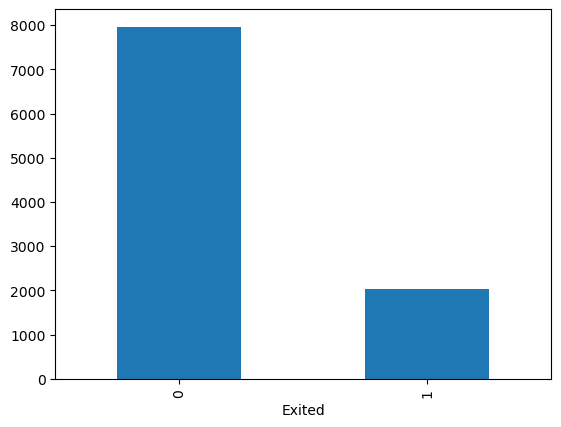

In [26]:
churn_df["Exited"].value_counts().plot.bar()

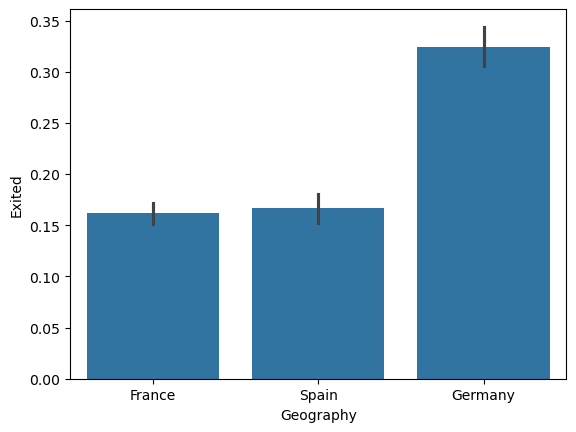

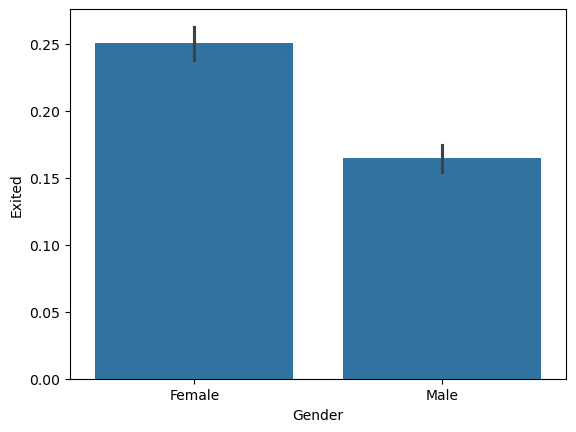

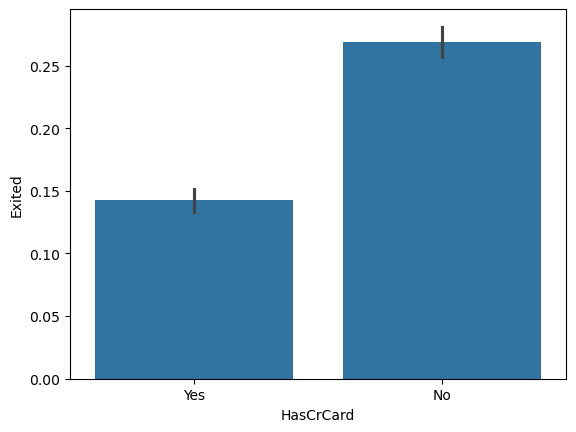

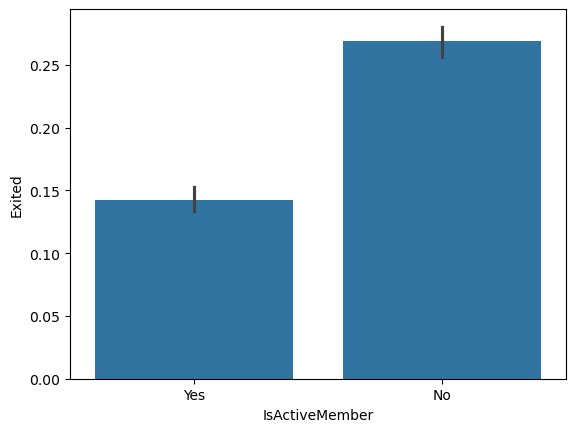

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in churn_df.drop("Surname", axis=1).select_dtypes("object"):
    sns.barplot(data=churn_df, x=col, y="Exited")
    plt.show()

In [34]:
churn_df.select_dtypes("object")

,Surname,Geography,Gender,HasCrCard,IsActiveMember
0,Hargrave,France,Female,Yes,Yes
2,Hill,Spain,Female,Yes,Yes
3,Onio,France,Female,No,No
4,Boni,France,Female,No,No
5,Mitchell,Spain,Female,Yes,Yes
...,...,...,...,...,...
9996,Obijiaku,France,Male,No,No
9997,Johnstone,France,Male,Yes,Yes
9998,Liu,France,Female,Yes,Yes
9999,Sabbatini,Germany,Male,No,No


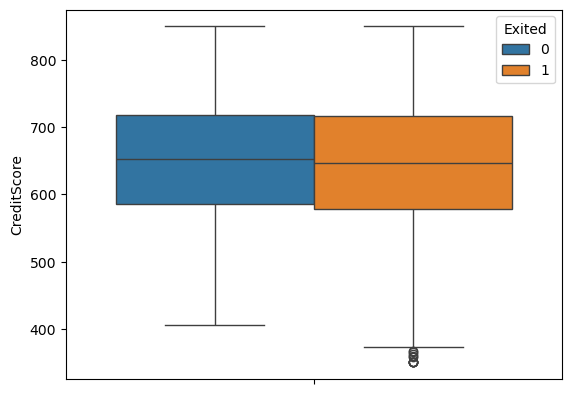

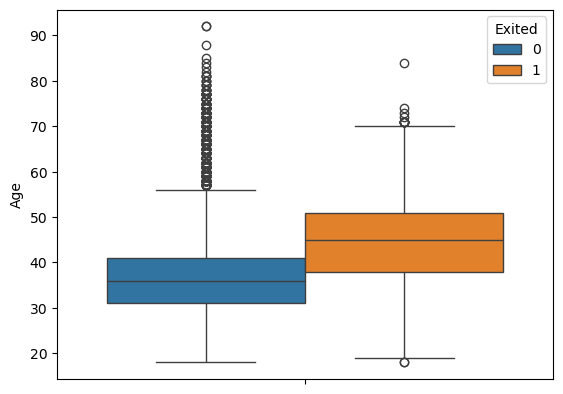

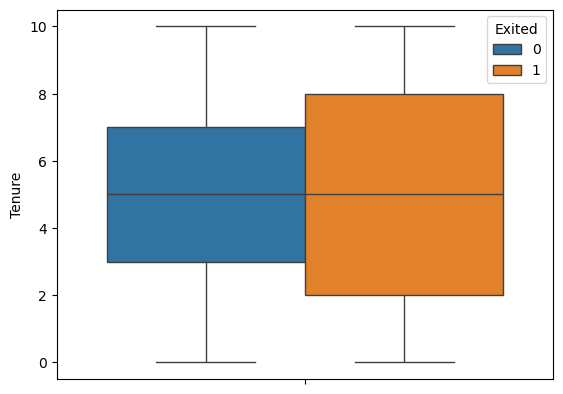

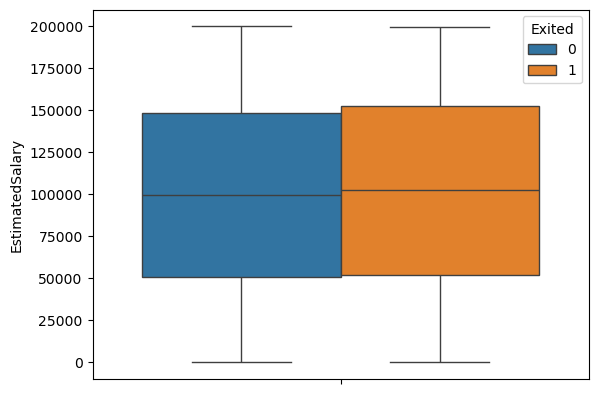

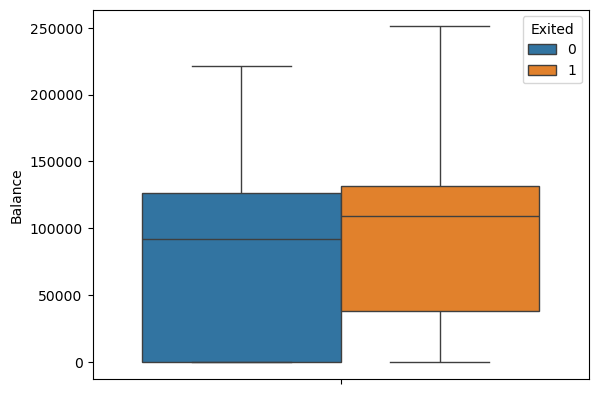

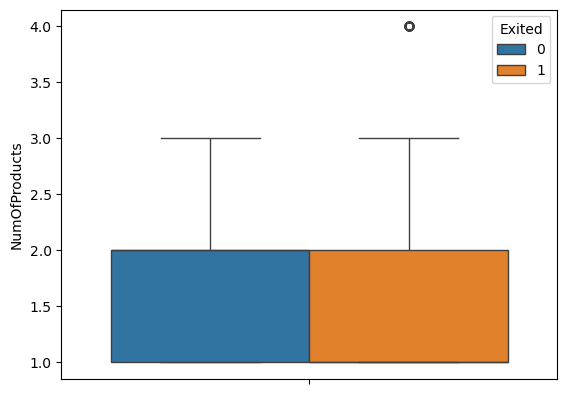

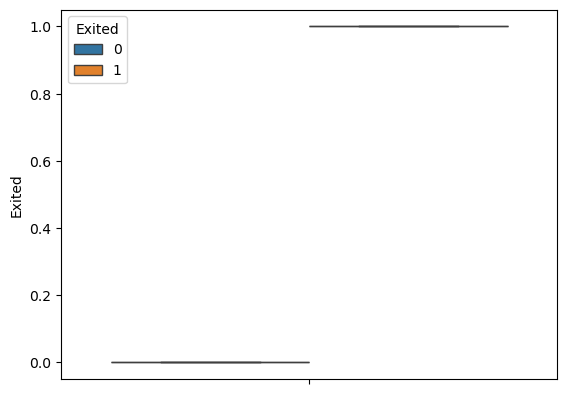

In [36]:
for col in churn_df.drop("CustomerId", axis=1).select_dtypes("number"):
    sns.boxplot(data=churn_df, y=col, hue="Exited")
    plt.show()

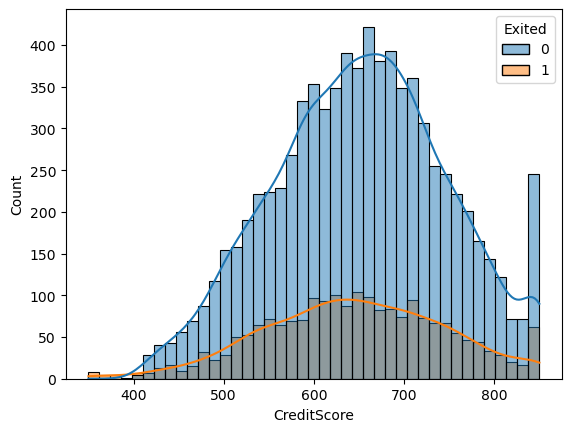

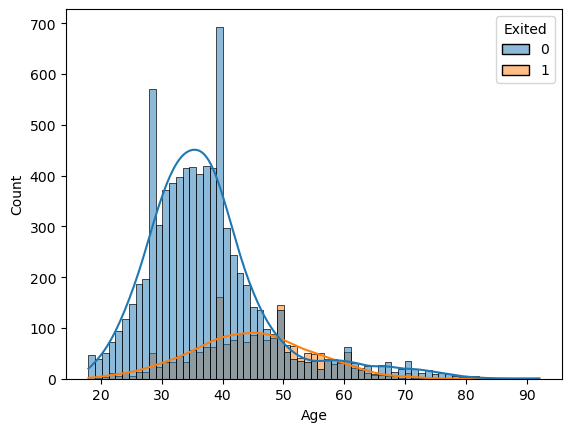

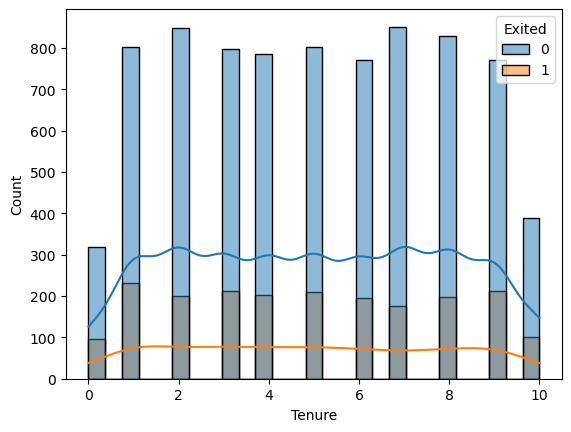

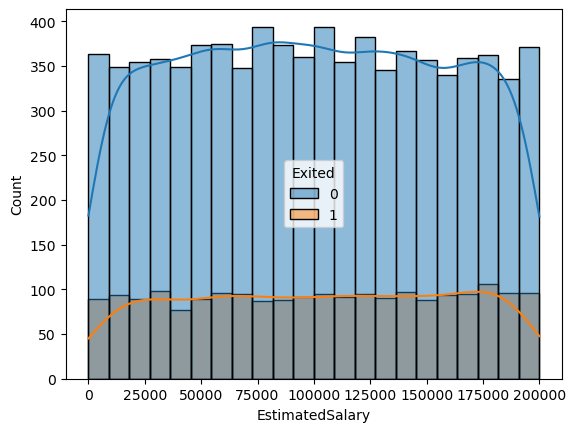

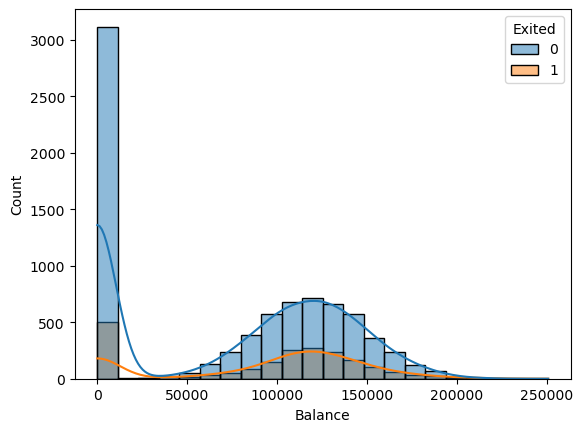

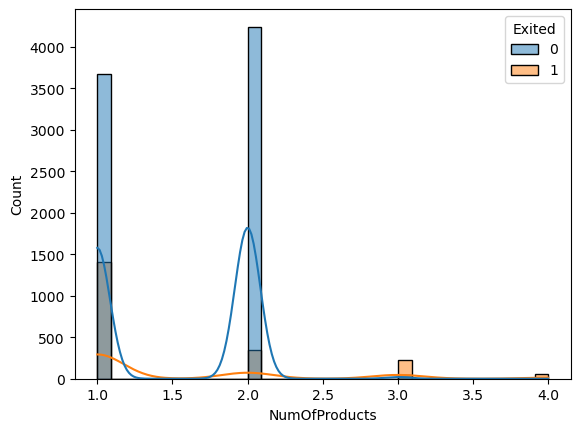

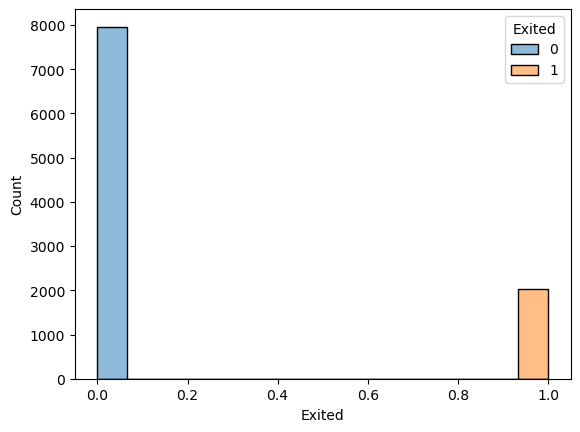

In [39]:
for col in churn_df.drop("CustomerId", axis=1).select_dtypes("number"):
    sns.histplot(data=churn_df, x=col, hue="Exited", kde=True)
    plt.show()

## Objective 4: Data Prep & Feature Engineering

In [40]:
churn_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,France,Female,42.0,2,101348.88,0.00,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,Yes,0
3,15619304,Onio,502,France,Female,42.0,8,113931.57,159660.80,3,No,No,1
4,15701354,Boni,699,France,Female,39.0,1,93826.63,0.00,2,No,No,0
5,15737888,Mitchell,850,Spain,Female,43.0,2,79084.10,125510.82,1,Yes,Yes,0


In [41]:
modelling_df = churn_df.drop(["CustomerId", "Surname"], axis=1)

modelling_df.head()

,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,619,France,Female,42.0,2,101348.88,0.00,1,Yes,Yes,1
2,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,Yes,0
3,502,France,Female,42.0,8,113931.57,159660.80,3,No,No,1
4,699,France,Female,39.0,1,93826.63,0.00,2,No,No,0
5,850,Spain,Female,43.0,2,79084.10,125510.82,1,Yes,Yes,0


In [45]:
modelling_df = pd.get_dummies(modelling_df, drop_first=True)

In [46]:
modelling_df["Balance_v_Sal"] = modelling_df["Balance"] / modelling_df["EstimatedSalary"]

modelling_df

,CreditScore,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,Exited,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_Yes,IsActiveMember_Yes,Balance_v_Sal
0,619,42.0,2,101348.88,0.00,1,1,False,False,False,True,True,0.000000
2,608,41.0,1,112542.58,83807.86,1,0,False,True,False,True,True,0.744677
3,502,42.0,8,113931.57,159660.80,3,1,False,False,False,False,False,1.401375
4,699,39.0,1,93826.63,0.00,2,0,False,False,False,False,False,0.000000
5,850,43.0,2,79084.10,125510.82,1,0,False,True,False,True,True,1.587055
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,771,39.0,5,96270.64,0.00,2,0,False,False,True,False,False,0.000000
9997,516,35.0,10,101699.77,57369.61,1,0,False,False,True,True,True,0.564108
9998,709,36.0,7,42085.58,0.00,1,1,False,False,False,True,True,0.000000
9999,772,42.0,3,92888.52,75075.31,2,1,True,False,True,False,False,0.808230


<Axes: ylabel='Balance_v_Sal'>

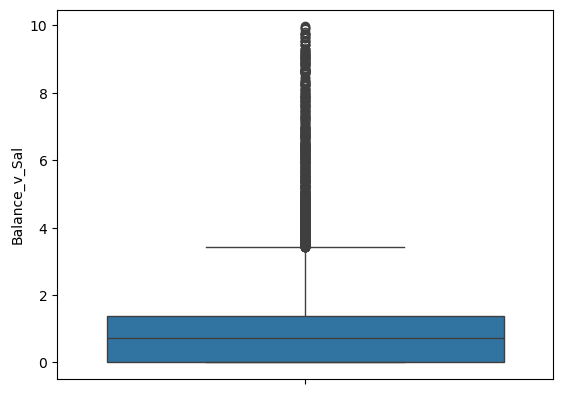

In [53]:
sns.boxplot(data=modelling_df.query("Balance_v_Sal < 10"), y="Balance_v_Sal")

In [49]:
modelling_df.describe()

,CreditScore,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,Exited,Balance_v_Sal
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921500,5.012800,100092.252506,76485.889288,1.530200,0.203700,3.878703
std,96.653299,10.487552,2.892174,57510.146401,62397.405202,0.581654,0.402769,108.337260
min,350.000000,18.000000,0.000000,11.580000,0.000000,1.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,51002.110000,0.000000,1.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,100196.062500,97198.540000,1.000000,0.000000,0.747002
75%,718.000000,44.000000,7.000000,149388.247500,127644.240000,2.000000,0.000000,1.514022
max,850.000000,92.000000,10.000000,199992.480000,250898.090000,4.000000,1.000000,10614.655440


<Axes: ylabel='Balance_v_Sal'>

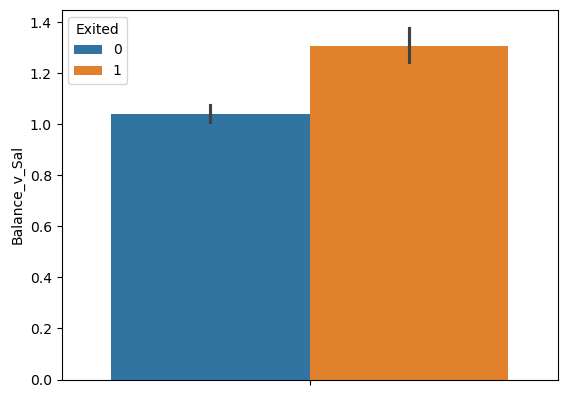

In [56]:
sns.barplot(data=modelling_df.query("Balance_v_Sal < 10"), y="Balance_v_Sal", hue="Exited")